<a href="https://colab.research.google.com/github/ymuto0302/base2_2020/blob/master/economic_correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 東証における17業種区分での企業数

In [ ]:
import pandas as pd
companies = pd.read_csv("TSE_corp_list.csv")

# TSEコードと 17業種区分のみ取り出して，業種区分でグループ化
companies = companies[['コード', '17業種区分']]
kubun = companies.groupby('17業種区分').count()

# 可視化
import plotly_express as px
fig = px.bar(kubun, orientation='h') # orientation='h' は horizontal を意味する
fig.show()

## (参考) 東証における33業種区分での企業数

In [ ]:
import pandas as pd
companies = pd.read_csv("TSE_corp_list.csv")

# TSEコードと 33業種区分のみ取り出して，業種区分でグループ化
companies = companies[['コード', '33業種区分']]
kubun = companies.groupby('33業種区分').count()

# 可視化
import plotly_express as px
fig = px.bar(kubun, orientation='h') # orientation='h' は horizontal を意味する
fig.show()

## 複数の企業株価の推移を並べてみる
以下では17業種区分にて「電機・精密」に分類されるソニーと日立製作所
および「食品」に区分される伊藤園の株価の推移を調べる。

下記のコードおよび実行結果に示すように，ソニーと日立製作所の株価の動きは類似するが，伊藤園は他の２社と異なる動きをしている。

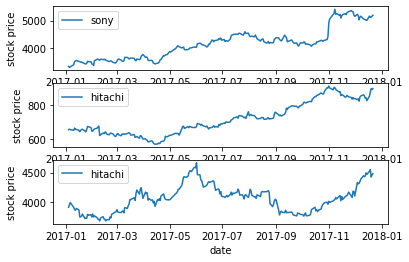

In [ ]:
import quandl

quandl.ApiConfig.api_key = "swWCyaT7PznGyDJwoPys"

# 株価の取得
# ソニー(TSE/6758)，日立製作所 (TSE/6501)，伊藤園(TSE/2593)
sony = quandl.get('TSE/6758', start_date='2017-01-01', end_date='2017-12-31')
hitachi = quandl.get('TSE/6501', start_date='2017-01-01', end_date='2017-12-31')
itoen = quandl.get('TSE/2593', start_date='2017-01-01', end_date='2017-12-31')

# 可視化 (本来，Figure を使う方が望ましいが，簡易版で勘弁して！)
import matplotlib.pyplot as plt
plt.subplot(3,1,1)
plt.plot(sony['Close'], label='sony')
plt.legend()
plt.xlabel("date")
plt.ylabel("stock price")

plt.subplot(3,1,2)
plt.plot(hitachi['Close'], label='hitachi')
plt.legend()
plt.xlabel("date")
plt.ylabel("stock price")

plt.subplot(3,1,3)
plt.plot(itoen['Close'], label='hitachi')
plt.legend()
plt.xlabel("date")
plt.ylabel("stock price")

plt.show()

## ２つの企業間の株価の(時系列)相関を調べる

In [ ]:
# ソニーと日立製作所
corr = sony['Close'].corr(hitachi['Close'])
print("ソニーと日立製作所の相関係数: {}".format(corr))

# ソニーと伊藤園
corr = sony['Close'].corr(itoen['Close'])
print("ソニーと伊藤園の相関係数: {}".format(corr))


ソニーと日立製作所の相関係数: 0.8353219741872472
ソニーと伊藤園の相関係数: 0.43117381623009904


In [ ]:
import quandl

In [ ]:
quandl.ApiConfig.api_key = "swWCyaT7PznGyDJwoPys"

In [ ]:
# TSE : Tokyo Stock Exchange
# 6758 : stock indicator
# ソニー(株)/ (6758)
# (株)日立製作所/ (6501)
#
# get() の使い方は以下に説明がある。
# https://www.quandl.com/data/TSE-Tokyo-Stock-Exchange/usage/quickstart/python
sony = quandl.get('TSE/6758', start_date='2017-01-01', end_date='2017-12-31')
hitachi = quandl.get('TSE/6501', start_date='2017-01-01', end_date='2017-12-31')

In [ ]:
sony[:5]

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-04,3305.0,3333.0,3274.0,3333.0,5914000.0
2017-01-05,3335.0,3337.0,3269.0,3296.0,7201700.0
2017-01-06,3328.0,3374.0,3311.0,3316.0,8873600.0
2017-01-10,3345.0,3439.0,3344.0,3394.0,11461200.0
2017-01-11,3464.0,3550.0,3462.0,3510.0,13620000.0


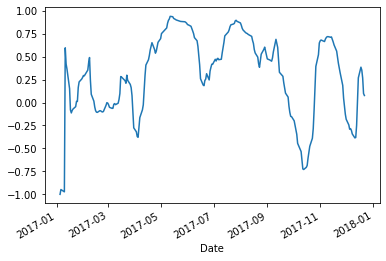

In [ ]:
# 移動相関
import pandas as pd
corr = sony['Close'].rolling(window=30, min_periods=0).corr(hitachi['Close'])
corr.plot()

'''
https://www.quandl.com/data/TSE-Tokyo-Stock-Exchange

Quandl における TSE の説明（ここには TSE コードの一覧はない）
https://www.quandl.com/data/TSE-Tokyo-Stock-Exchange/documentation

# TSEコードの一覧は以下から入手できる
https://www.jpx.co.jp/markets/statistics-equities/misc/01.html

商品区分から「市場第一部（内国株）」のみをとれば東証一部企業が得られる
次の項目を CSV ファイルへ残す
コード, 銘柄名, 33業種コード, 33業種区分, 17業種コード, 17業種区分

(注意)東証一部状況企業は約2,160社，ある。全データ取得に相応の時間がかかる点に注意！
'''

In [ ]:
# 東証一部上場企業のみを取り出す
import csv

data = []
with open("TSE/data_j.csv", "r", encoding="utf-8") as f:
    reader = csv.DictReader(f) # ヘッダのついた CSV ファイルの読み込みに DictReader を利用
    for row in reader:
        if row['市場・商品区分']== '市場第一部（内国株）':
                # print(row)
                data.append([row['コード'], row['銘柄名'], row['33業種コード'], row['33業種区分'], row['17業種コード'], row['17業種区分']])

header = ['コード', '銘柄名', '33業種コード', '33業種区分', '17業種コード', '17業種区分']
with open("TSE/data_j_1.csv", "w",  newline="",  encoding="utf-8") as f:
    writer = csv.writer(f, delimiter=',', quoting=csv.QUOTE_NONE) #, quotechar='"', quoting=csv.QUOTE_ALL)
    writer.writerow(header)
    writer.writerows(data)

In [ ]:
import quandl
quandl.ApiConfig.api_key = "swWCyaT7PznGyDJwoPys"

with open("TSE/data_j_1.csv", "r", encoding="utf-8") as f:
    reader = csv.DictReader(f) # ヘッダのついた CSV ファイルの読み込みに DictReader を利用
    
    valid_meigara = 0
    for row in reader:
        indicator = "TSE/{}".format(row['コード'])
        try:
            data = quandl.get(indicator)
            # print(row['銘柄名'])
            # print(data[:3])
            data.to_csv(indicator + ".csv")
            valid_meigara += 1
        except quandl.NotFoundError as e:
            print(row['銘柄名'])

print("有効な銘柄数", valid_meigara)

キャンディル
スペースバリューホールディングス
日本国土開発
スター・マイカ・ホールディングス
ＡＤワークスグループ
信和
ワールド
ＨＥＲＯＺ
ラクスル
ＦＩＧ
システムサポート
イーソル
アルテリア・ネットワークス
東海ソフト
ヒト・コミュニケーションズ・ホールディングス
トビラシステムズ
ミダック
日総工産
キュービーネットホールディングス
ＲＰＡホールディングス
ダイヤモンドエレクトリックホールディングス
スプリックス
マネジメントソリューションズ
プロレド・パートナーズ
ａｎｄ　ｆａｃｔｏｒｙ
ギークス
カーブスホールディングス
フォーラムエンジニアリング
関西みらいフィナンシャルグループ
三十三フィナンシャルグループ
第四北越フィナンシャルグループ
ダイコー通産
薬王堂ホールディングス
未来工業
オリバー
クワザワ
ヤマエ久野
コーア商事ホールディングス
国際紙パルプ商事
ナルミヤ・インターナショナル
ブックオフグループホールディングス
ソフトバンク
ファイバーゲート
有効な銘柄数 2126


In [ ]:
import quandl
quandl.ApiConfig.api_key = "swWCyaT7PznGyDJwoPys"

import glob
paths = glob.glob("TSE/*.csv")
# print(paths)
getted = []
for path in paths:
    try:
        getted.append(int(path.split('\\')[1].split('.')[0]))
    except:
        pass

# import sys
#sys.exit()

valid_meigara = 0
for x in range(1300, 10000):
    if x in getted:
        continue
        
    indicator = "TSE/{}".format(x)
    try:
        data = quandl.get(indicator)
        # print(row['銘柄名'])
        # print(data[:3])
        print("fonud {}".format(indicator))
        data.to_csv(indicator + ".csv")
        valid_meigara += 1
    except quandl.NotFoundError as e:
        print("{} is not found".format(indicator))

print("有効な銘柄数", valid_meigara)

TSE/1300 is not found
TSE/1302 is not found
TSE/1303 is not found
TSE/1304 is not found
fonud TSE/1305
fonud TSE/1306
TSE/1307 is not found
fonud TSE/1308
fonud TSE/1309
fonud TSE/1310
fonud TSE/1311
fonud TSE/1312
fonud TSE/1313
fonud TSE/1314
TSE/1315 is not found
fonud TSE/1316
fonud TSE/1317
fonud TSE/1318
fonud TSE/1319
fonud TSE/1320
fonud TSE/1321
fonud TSE/1322
fonud TSE/1323
fonud TSE/1324
fonud TSE/1325
fonud TSE/1326
fonud TSE/1327
fonud TSE/1328
fonud TSE/1329
fonud TSE/1330
TSE/1331 is not found
fonud TSE/1334
TSE/1335 is not found
TSE/1336 is not found
TSE/1337 is not found
TSE/1338 is not found
TSE/1339 is not found
TSE/1340 is not found
TSE/1341 is not found
TSE/1342 is not found
fonud TSE/1343
fonud TSE/1344
fonud TSE/1345
fonud TSE/1346
fonud TSE/1347
fonud TSE/1348
fonud TSE/1349
TSE/1350 is not found
TSE/1351 is not found
TSE/1353 is not found
TSE/1354 is not found
TSE/1355 is not found
fonud TSE/1356
fonud TSE/1357
fonud TSE/1358
TSE/1359 is not found
fonud TSE/136

fonud TSE/1795
TSE/1796 is not found
TSE/1797 is not found
fonud TSE/1798
fonud TSE/1799
TSE/1800 is not found
TSE/1804 is not found
TSE/1806 is not found
fonud TSE/1807
TSE/1809 is not found
TSE/1816 is not found
TSE/1817 is not found
TSE/1818 is not found
fonud TSE/1819
TSE/1823 is not found
TSE/1825 is not found
fonud TSE/1828
TSE/1829 is not found
TSE/1830 is not found
TSE/1831 is not found
TSE/1832 is not found
fonud TSE/1834
TSE/1836 is not found
TSE/1837 is not found
TSE/1838 is not found
TSE/1839 is not found
fonud TSE/1840
fonud TSE/1841
TSE/1842 is not found
TSE/1843 is not found
fonud TSE/1844
TSE/1845 is not found
fonud TSE/1846
TSE/1849 is not found
fonud TSE/1850
TSE/1851 is not found
fonud TSE/1853
TSE/1854 is not found
TSE/1855 is not found
TSE/1856 is not found
TSE/1857 is not found
TSE/1858 is not found
TSE/1859 is not found
TSE/1862 is not found
TSE/1863 is not found
TSE/1864 is not found
fonud TSE/1865
fonud TSE/1868
TSE/1869 is not found
TSE/1872 is not found
TSE/1

TSE/2366 is not found
TSE/2367 is not found
TSE/2368 is not found
fonud TSE/2369
fonud TSE/2370
fonud TSE/2373
fonud TSE/2375
TSE/2377 is not found
TSE/2380 is not found
TSE/2381 is not found
TSE/2382 is not found
TSE/2383 is not found
fonud TSE/2385
TSE/2386 is not found
TSE/2387 is not found
fonud TSE/2388
TSE/2390 is not found
fonud TSE/2391
TSE/2392 is not found
fonud TSE/2393
TSE/2394 is not found
TSE/2396 is not found
fonud TSE/2397
fonud TSE/2399
fonud TSE/2400
TSE/2401 is not found
fonud TSE/2402
TSE/2403 is not found
fonud TSE/2404
fonud TSE/2405
fonud TSE/2406
TSE/2407 is not found
fonud TSE/2408
TSE/2409 is not found
fonud TSE/2411
TSE/2414 is not found
fonud TSE/2415
TSE/2416 is not found
fonud TSE/2417
TSE/2419 is not found
TSE/2420 is not found
TSE/2421 is not found
TSE/2422 is not found
TSE/2423 is not found
fonud TSE/2425
TSE/2426 is not found
TSE/2430 is not found
TSE/2431 is not found
fonud TSE/2434
fonud TSE/2435
fonud TSE/2436
fonud TSE/2437
fonud TSE/2438
TSE/2439 

fonud TSE/2877
TSE/2878 is not found
TSE/2879 is not found
TSE/2880 is not found
TSE/2881 is not found
TSE/2885 is not found
TSE/2886 is not found
TSE/2887 is not found
TSE/2888 is not found
TSE/2889 is not found
TSE/2890 is not found
TSE/2891 is not found
fonud TSE/2892
TSE/2893 is not found
fonud TSE/2894
TSE/2895 is not found
TSE/2896 is not found
TSE/2898 is not found
TSE/2900 is not found
fonud TSE/2901
TSE/2902 is not found
fonud TSE/2903
fonud TSE/2905
TSE/2906 is not found
fonud TSE/2907
TSE/2909 is not found
fonud TSE/2911
TSE/2912 is not found
TSE/2913 is not found
fonud TSE/2916
fonud TSE/2917
TSE/2919 is not found
TSE/2920 is not found
TSE/2921 is not found
fonud TSE/2923
fonud TSE/2926
fonud TSE/2927
TSE/2928 is not found
fonud TSE/2929
TSE/2932 is not found
TSE/2933 is not found
TSE/2934 is not found
TSE/2935 is not found
TSE/2936 is not found
TSE/2937 is not found
TSE/2938 is not found
TSE/2939 is not found
TSE/2940 is not found
TSE/2941 is not found
TSE/2942 is not foun

fonud TSE/3453
fonud TSE/3455
fonud TSE/3456
fonud TSE/3459
fonud TSE/3460
fonud TSE/3461
fonud TSE/3462
fonud TSE/3463
fonud TSE/3466
fonud TSE/3468
fonud TSE/3469
fonud TSE/3470
fonud TSE/3471
fonud TSE/3472
fonud TSE/3473
fonud TSE/3474
fonud TSE/3476
fonud TSE/3477
fonud TSE/3478
fonud TSE/3479
fonud TSE/3481
fonud TSE/3482
fonud TSE/3483
TSE/3485 is not found
TSE/3487 is not found
TSE/3488 is not found
TSE/3489 is not found
TSE/3490 is not found
TSE/3491 is not found
TSE/3492 is not found
TSE/3493 is not found
TSE/3494 is not found
TSE/3495 is not found
TSE/3496 is not found
TSE/3497 is not found
TSE/3498 is not found
TSE/3499 is not found
TSE/3500 is not found
TSE/3502 is not found
TSE/3503 is not found
TSE/3504 is not found
TSE/3505 is not found
TSE/3506 is not found
TSE/3507 is not found
TSE/3508 is not found
TSE/3509 is not found
TSE/3510 is not found
TSE/3511 is not found
fonud TSE/3514
fonud TSE/3515
TSE/3516 is not found
TSE/3517 is not found
TSE/3518 is not found
TSE/3519 

KeyboardInterrupt: 

In [ ]:
import csv

import os

data = []
with open("TSE/data_j_1.csv", "r", encoding="utf-8") as f:
    reader = csv.DictReader(f) # ヘッダのついた CSV ファイルの読み込みに DictReader を利用

    for row in reader:
        path = "TSE/{}.csv".format(row['コード'])
        if os.path.exists(path):
            data.append([row['コード'], row['銘柄名'], row['33業種コード'], row['33業種区分'], row['17業種コード'], row['17業種区分']])

header = ['コード', '銘柄名', '33業種コード', '33業種区分', '17業種コード', '17業種区分']
with open("TSE/data_j_1_next.csv", "w",  newline="",  encoding="utf-8") as f:
    writer = csv.writer(f, delimiter=',', quoting=csv.QUOTE_NONE) #, quotechar='"', quoting=csv.QUOTE_ALL)
    writer.writerow(header)
    writer.writerows(data)

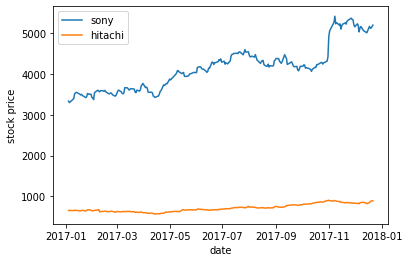

In [ ]:
import matplotlib.pyplot as plt
plt.plot(sony['Close'], label='sony')
plt.plot(hitachi['Close'], label='hitachi')
plt.legend()
plt.xlabel("date")
plt.ylabel("stock price")
plt.show()

In [ ]:
type(sony)

pandas.core.frame.DataFrame

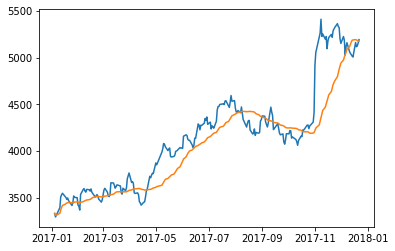

In [ ]:
# 移動平均 (MA: moving aberage)
#
# ソニー(株)/ (6758)
import quandl
import matplotlib.pyplot as plt

quandl.ApiConfig.api_key = "swWCyaT7PznGyDJwoPys"
sony = quandl.get('TSE/6758', start_date='2017-01-01', end_date='2017-12-31')

# 移動平均 (MA: moving aberage) ここでは 30日移動平均を求めている
sony['30MA'] = sony['Close'].rolling(window=30, min_periods=0).mean()

plt.plot(sony['Close'])
plt.plot(sony['30MA'])
plt.show()

In [ ]:
sony

,Open,High,Low,Close,Volume,30MA
Date,,,,,,
2017-01-04,3305.0,3333.0,3274.0,3333.0,5914000.0,3333.000000
2017-01-05,3335.0,3337.0,3269.0,3296.0,7201700.0,3314.500000
2017-01-06,3328.0,3374.0,3311.0,3316.0,8873600.0,3315.000000
2017-01-10,3345.0,3439.0,3344.0,3394.0,11461200.0,3334.750000
2017-01-11,3464.0,3550.0,3462.0,3510.0,13620000.0,3369.800000
...,...,...,...,...,...,...
2017-12-18,5068.0,5163.0,5067.0,5161.0,7103000.0,5192.133333
2017-12-19,5150.0,5156.0,5110.0,5116.0,4931600.0,5188.600000
2017-12-20,5135.0,5138.0,5089.0,5125.0,3576900.0,5184.066667


In [ ]:
# どの範囲のデータが入手可能か，試してみる → 2007年～2017年
data = quandl.get("TSE/6902") # DENSO
# data.to_csv('TSE_6902.csv')
data

,Open,High,Low,Close,Volume
Date,,,,,
2007-01-04,4790.0,4800.0,4750.0,4790.0,878200.0
2007-01-05,4760.0,4770.0,4600.0,4640.0,1928200.0
2007-01-09,4660.0,4670.0,4600.0,4640.0,2526000.0
2007-01-10,4620.0,4640.0,4530.0,4550.0,2761100.0
2007-01-11,4620.0,4680.0,4580.0,4640.0,3108600.0
...,...,...,...,...,...
2017-12-18,6400.0,6496.0,6393.0,6479.0,1814900.0
2017-12-19,6504.0,6582.0,6504.0,6553.0,2118900.0
2017-12-20,6550.0,6588.0,6543.0,6579.0,1401200.0


In [ ]:
# Internet users (per 100 people)
df = quandl.get(["WWDI/JPN_IT_NET_USER_P2",
                 "WWDI/KOR_IT_NET_USER_P2",
                 "WWDI/CHN_IT_NET_USER_P2"])
df.columns = ["Japan", "Korea", "China"]
df

,Japan,Korea,China
Date,,,
1990-12-31,0.020294,0.023265,0.000000
1991-12-31,0.040438,0.046124,NaN
1992-12-31,0.096678,0.098404,NaN
1993-12-31,0.401278,0.249947,0.000169
1994-12-31,0.799684,0.311359,0.001168
1995-12-31,1.594363,0.819687,0.004955
1996-12-31,4.372982,1.624237,0.013082
1997-12-31,9.163077,3.600802,0.032395
1998-12-31,13.414041,6.781815,0.168540


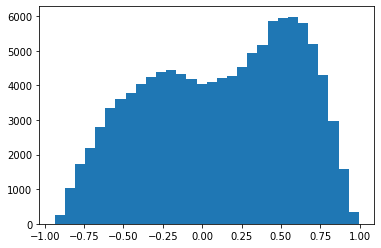

In [ ]:
import pandas as pd
import quandl
import os
import sys

quandl.ApiConfig.api_key = "swWCyaT7PznGyDJwoPys"

def get_stock_data(code):
    indicator = "TSE/{}".format(code)
    if os.path.exists("{}.csv".format(indicator)):
        data = pd.read_csv("{}.csv".format(indicator))
    else:
        data = quandl.get(indicator)

    return data

companies = pd.read_csv("TSE/data_j_1_next.csv")
# print(type(companies['コード'][0]))

foods = companies[companies['17業種区分']=='情報通信・サービスその他']
# foods = companies[companies['17業種コード']==1]
#print(foods)
#print(len(foods))

# sys.exit(1)
food_companies = dict()
for idx in range(len(foods)):
    # print(foods.iloc[idx,:])
    # print(foods.iloc[idx, 0])
    # data = get_stock_data(foods['コード'][0])
    food_companies[foods.iloc[idx,0]] = get_stock_data(foods.iloc[idx,0])

# food_companies.keys()

px = []
import itertools
list(food_companies.keys())
c = itertools.combinations(list(food_companies.keys()), 2)
for cc in c:
    # print(cc)
    # corr = food_companies[cc[0]]['Close'].rolling(window=30, min_periods=0).corr(food_companies[cc[1]]['Close'])
    # corr.plot()
    corr = food_companies[cc[0]]['Close'].corr(food_companies[cc[1]]['Close'])
    # print("{}-{}: {}".format(cc[0], cc[1], corr))
    px.append(corr)
    
import matplotlib.pyplot as plt
plt.hist(px, bins=30)
plt.show()

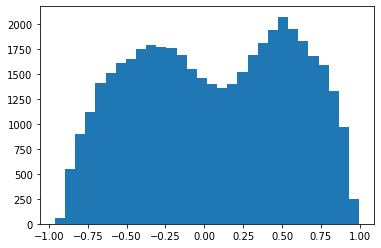

In [ ]:
# 2つの業種の相関
import pandas as pd
import quandl
import os
import sys

quandl.ApiConfig.api_key = "swWCyaT7PznGyDJwoPys"

def get_stock_data(code):
    indicator = "TSE/{}".format(code)
    if os.path.exists("{}.csv".format(indicator)):
        data = pd.read_csv("{}.csv".format(indicator))
    else:
        data = quandl.get(indicator)

    return data

def make_industry(companies, kind):
    industry = companies[companies['17業種区分']==kind]
    ret = dict()
    for idx in range(len(industry)):
        # print(foods.iloc[idx,:])
        # print(foods.iloc[idx, 0])
        # data = get_stock_data(foods['コード'][0])
        ret[industry.iloc[idx,0]] = get_stock_data(industry.iloc[idx,0])

    return industry, ret

companies = pd.read_csv("TSE/data_j_1_next.csv")
# print(type(companies['コード'][0]))

industry_1, companies_1 = make_industry(companies, '食品')
industry_2, companies_2 = make_industry(companies, '情報通信・サービスその他')
# foods = companies[companies['17業種コード']==1]
#print(foods)
#print(len(foods))companies = pd.read_csv("TSE/data_j_1_next.csv")

# sys.exit(1)

# food_companies.keys()

px = []

'''
import itertools
list(food_companies.keys())
c = itertools.combinations(list(food_companies.keys()), 2)
for cc in c:
    # print(cc)
    # corr = food_companies[cc[0]]['Close'].rolling(window=30, min_periods=0).corr(food_companies[cc[1]]['Close'])
    # corr.plot()
    corr = food_companies[cc[0]]['Close'].corr(food_companies[cc[1]]['Close'])
    # print("{}-{}: {}".format(cc[0], cc[1], corr))
    px.append(corr)
'''
c = []
for ind_1 in industry_1['コード']:
    for ind_2 in industry_2['コード']:
      c.append((ind_1, ind_2))
for cc in c:
    # print(cc)
    # corr = food_companies[cc[0]]['Close'].rolling(window=30, min_periods=0).corr(food_companies[cc[1]]['Close'])
    # corr.plot()
    # print(cc)
    corr = companies_1[cc[0]]['Close'].corr(companies_2[cc[1]]['Close'])
    # print("{}-{}: {}".format(cc[0], cc[1], corr))
    px.append(corr)
        
import matplotlib.pyplot as plt
plt.hist(px, bins=30)
plt.show()

In [ ]:
data

,Date,Open,High,Low,Close,Volume
0,2007-01-04,255.0,256.0,253.0,255.0,165000.0
1,2007-01-05,255.0,256.0,250.0,250.0,454000.0
2,2007-01-09,252.0,254.0,251.0,252.0,288000.0
3,2007-01-10,253.0,253.0,250.0,250.0,278000.0
4,2007-01-11,251.0,253.0,250.0,250.0,255000.0
...,...,...,...,...,...,...
2685,2017-12-18,3990.0,4035.0,3975.0,4025.0,24700.0
2686,2017-12-19,4040.0,4070.0,3995.0,4065.0,36100.0
2687,2017-12-20,4040.0,4165.0,4010.0,4130.0,59400.0
2688,2017-12-21,4100.0,4185.0,4090.0,4175.0,44200.0


In [ ]:
companies

,コード,銘柄名,33業種コード,33業種区分,17業種コード,17業種区分
0,1301,極洋,50,水産・農林業,1,食品
1,1332,日本水産,50,水産・農林業,1,食品
2,1333,マルハニチロ,50,水産・農林業,1,食品
3,1352,ホウスイ,6050,卸売業,13,商社・卸売
4,1376,カネコ種苗,50,水産・農林業,1,食品
...,...,...,...,...,...,...
2121,9991,ジェコス,6050,卸売業,13,商社・卸売
2122,9993,ヤマザワ,6100,小売業,14,小売
2123,9994,やまや,6100,小売業,14,小売
2124,9995,グローセル,6050,卸売業,13,商社・卸売
